In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
# from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
scrubbed_data = pd.read_csv('../raw_data/scrubbed.csv', low_memory=False)
scrubbed_data.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [3]:
# scrubbed_data['datetime'] = pd.to_datetime(scrubbed_data['datetime'])
scrubbed_data['datetime'] = scrubbed_data['datetime'].apply(lambda x: x.replace('24:','0:'))
scrubbed_data['datetime'] = pd.to_datetime(scrubbed_data['datetime'])

In [4]:
scrubbed_data.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted                     object
latitude                        object
longitude                      float64
dtype: object

In [5]:
data_ = scrubbed_data[scrubbed_data['datetime'] > pd.to_datetime('1999-12-31 23:59:59')]

In [6]:
print(scrubbed_data.shape[0],data_.shape[0])

80332 64826


In [7]:
# dates = data_['datetime'].apply (lambda x: x.strftime("%Y-%m-%d")).tail(200)
# sightings = data_['state'].apply(lambda x: 1).tail(200)

In [8]:
data_.datetime

93      2000-10-10 03:00:00
94      2000-10-10 06:15:00
95      2000-10-10 07:30:00
96      2000-10-10 16:00:00
97      2000-10-10 20:20:00
                ...        
80327   2013-09-09 21:15:00
80328   2013-09-09 22:00:00
80329   2013-09-09 22:00:00
80330   2013-09-09 22:20:00
80331   2013-09-09 23:00:00
Name: datetime, Length: 64826, dtype: datetime64[ns]

In [22]:
dates_diff_1 = data_['datetime'].diff().apply(lambda x: x.total_seconds()/60)[1:]

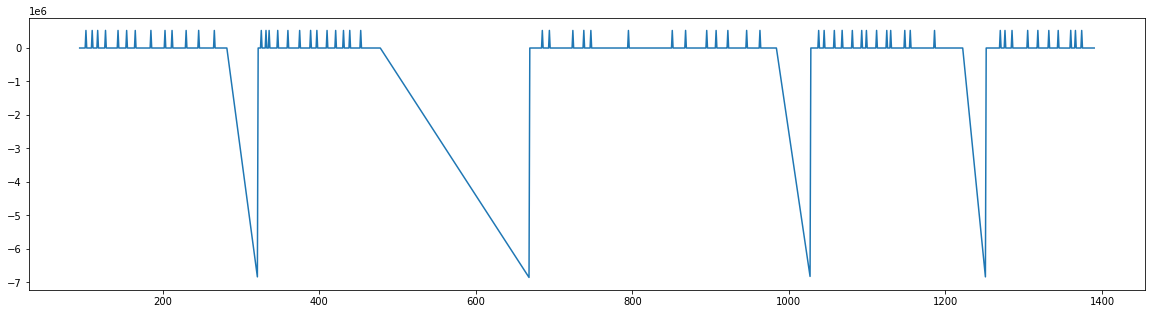

In [23]:
tmp_ = dates_diff_1.head(1000)
plt.figure(figsize=(20,5)); plt.plot(tmp_); plt.show()

In [26]:
dates_diff_1[300:310]

432       325.0
433       380.0
434       280.0
435         2.0
436        78.0
437        10.0
438       133.0
439    525697.0
440       105.0
441        75.0
Name: datetime, dtype: float64